<a href="https://colab.research.google.com/github/pawel0508/NeuralNetworks/blob/main/Klasyfikacja_Wieloklasowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision = 12, suppress = True, linewidth = 150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__


'2.3.0'

#### **Ładowanie danych**

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'x test shape: {x_test.shape}')
print(f'y test shape: {y_test.shape}')


4423680/4422102 [==============================] - 0s 0us/step
x train shape: (60000, 28, 28)
y train shape: (60000,)
x test shape: (10000, 28, 28)
y test shape: (10000,)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

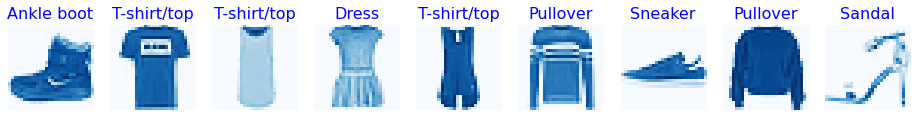

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(18, 13))
for i in range(1,10):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(x_train[i-1], cmap = 'Blues')
  plt.title(class_names[y_train[i-1]], color = 'blue', fontsize = 16)

In [7]:
x_train = x_train/255.
x_test = x_test/255.

### **Budowa modelu**

In [8]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, batch_size = 10, epochs = 10, validation_split = 0.2)

Epoch 1/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4954 - accuracy: 0.8254 - val_loss: 0.4528 - val_accuracy: 0.8318
Epoch 2/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.3735 - accuracy: 0.8638 - val_loss: 0.3767 - val_accuracy: 0.8635
Epoch 3/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.3351 - accuracy: 0.8770 - val_loss: 0.3554 - val_accuracy: 0.8698
Epoch 4/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.3132 - accuracy: 0.8844 - val_loss: 0.3643 - val_accuracy: 0.8762
Epoch 5/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.2949 - accuracy: 0.8918 - val_loss: 0.3642 - val_accuracy: 0.8762
Epoch 6/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.2845 - accuracy: 0.8942 - val_loss: 0.3563 - val_accuracy: 0.8726
Epoch 7/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.2712 - accuracy: 0.8994 - val_loss: 0.3404 - val_accuracy:

In [10]:
metrics = pd.DataFrame(history.history)
metrics['epochs'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epochs
0,0.495396,0.825375,0.452769,0.831833,0
1,0.373514,0.863813,0.376693,0.863500,1
2,0.335080,0.876979,0.355436,0.869833,2
3,0.313207,0.884375,0.364333,0.876167,3
4,0.294853,0.891813,0.364162,0.876167,4
5,0.284500,0.894229,0.356292,0.872583,5
6,0.271189,0.899375,0.340353,0.878500,6
7,0.257485,0.902021,0.339690,0.879250,7
8,0.251076,0.905062,0.346026,0.883500,8
9,0.242990,0.907083,0.345231,0.882500,9


### **Ocena modelu**

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epochs'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epochs'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epochs'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epochs'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss', template = 'simple_white')
fig.show()

#### **model.evaluate()** pozwala obliczyć metryki modelu

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

In [13]:
print(test_acc)

0.8737000226974487


In [14]:
predictions = model.predict(x_test)

In [15]:
predictions

array([[0.            , 0.            , 0.            , ..., 0.012602994   , 0.000000000049, 0.98739094    ],
       [0.000001716854, 0.            , 0.99212486    , ..., 0.            , 0.00000000003 , 0.000000000005],
       [0.000000000005, 1.            , 0.000000000003, ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000000123746, 0.            , 0.00000000602 , ..., 0.            , 0.999977      , 0.            ],
       [0.000000000211, 0.999995      , 0.000000000004, ..., 0.            , 0.000000003225, 0.            ],
       [0.000005475593, 0.000000000033, 0.000000045742, ..., 0.06905564    , 0.000035241417, 0.00017607436 ]], dtype=float32)

In [16]:
predictions_df = pd.DataFrame(predictions)

In [17]:
predictions_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,0.000000,0.012603,0.000000,0.987391
1,0.000002,0.000000,0.992125,0.000000,0.007360,0.000000,0.000514,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.030429,0.000000,0.004306,0.000542,0.000101,0.000000,0.964620,0.000000,0.000001,0.000000
...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000037,0.000000,0.999963
9996,0.000000,0.999978,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9997,0.000000,0.000000,0.000000,0.000000,0.000014,0.000000,0.000008,0.000000,0.999977,0.000000
9998,0.000000,0.999995,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
predictions_cls = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

### **Eksploracja predykcji**

In [25]:
#@title Wybierz indeks zdjęcia:
idx = 6693 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(y=class_names, x=predictions_df.iloc[idx], orientation='h', 
                     marker_color=color))
fig.update_layout(width=800, title=f'Predykcja: {class_names[predictions_cls[idx]]}',
                  template = 'simple_white')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (x_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### **Błędnie sklasyfikowany obraz**

In [26]:
misclassified = []
for idx, _ in enumerate(x_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 97 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(y=class_names, 
                     x=predictions_df.iloc[index_mapper[idx]], 
                     orientation='h', 
                     marker_color='red'))

fig.update_layout(width=800,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'),
                  template = 'simple_white')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (x_test[index_mapper[idx]] * 255).astype(np.uint8) # bo mieliśmy normalizację
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

In [29]:
index_mapper


{0: 12,
 1: 17,
 2: 25,
 3: 29,
 4: 42,
 5: 49,
 6: 51,
 7: 66,
 8: 67,
 9: 68,
 10: 89,
 11: 98,
 12: 107,
 13: 135,
 14: 136,
 15: 141,
 16: 147,
 17: 149,
 18: 150,
 19: 151,
 20: 153,
 21: 155,
 22: 172,
 23: 192,
 24: 222,
 25: 227,
 26: 229,
 27: 239,
 28: 241,
 29: 244,
 30: 249,
 31: 250,
 32: 255,
 33: 263,
 34: 271,
 35: 283,
 36: 313,
 37: 314,
 38: 316,
 39: 324,
 40: 325,
 41: 332,
 42: 337,
 43: 341,
 44: 359,
 45: 361,
 46: 367,
 47: 368,
 48: 374,
 49: 381,
 50: 382,
 51: 394,
 52: 396,
 53: 404,
 54: 406,
 55: 413,
 56: 441,
 57: 444,
 58: 457,
 59: 460,
 60: 474,
 61: 480,
 62: 490,
 63: 491,
 64: 527,
 65: 547,
 66: 565,
 67: 577,
 68: 578,
 69: 586,
 70: 589,
 71: 595,
 72: 608,
 73: 623,
 74: 639,
 75: 661,
 76: 670,
 77: 681,
 78: 688,
 79: 701,
 80: 702,
 81: 711,
 82: 722,
 83: 725,
 84: 732,
 85: 750,
 86: 753,
 87: 760,
 88: 787,
 89: 800,
 90: 801,
 91: 823,
 92: 830,
 93: 851,
 94: 870,
 95: 881,
 96: 887,
 97: 898,
 98: 902,
 99: 905,
 100: 908,
 101: 910,
